In [1]:
# Import libraries
import pandas as pd
import pyreadstat as pyr

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# 3rd analysis
#load df
df, meta = pyr.read_sav('afrobarometer_nigeria_rd8_2021.sav')
# Select specific columns from the Dataframe based on the information provided in the metadata
# and Replaces the code numbers with the actual values in each column using their actual name in the metadata
columns = ['REGION','Q4B', 'Q5']
df_new = df.copy()[columns]
for i in columns:
    x = meta.variable_value_labels[i]
    df_new[i].replace(x, inplace=True)
    


# Rename columns
df_new.columns = ['State', 'Living condition', 'Treated unfairly by govt based on econ status']

df_new.head()

,State,Living condition,Treated unfairly by govt based on econ status
0,IMO,Fairly Good,Never
1,FCT ABUJA,Fairly Bad,Always
2,FCT ABUJA,Very good,Often
3,FCT ABUJA,Neither good nor bad,Often
4,FCT ABUJA,Fairly Good,Often


In [23]:
df_new = df_new.loc[df_new["Living condition"] != "Don't know"]

In [27]:
df_new = df_new.loc[df_new["Living condition"] != "Refused"]

In [31]:
df_new = df_new.loc[df_new['Treated unfairly by govt based on econ status'] != "Refused"]


In [35]:
df_new = df_new.loc[df_new['Treated unfairly by govt based on econ status'] != "Don’t know"]

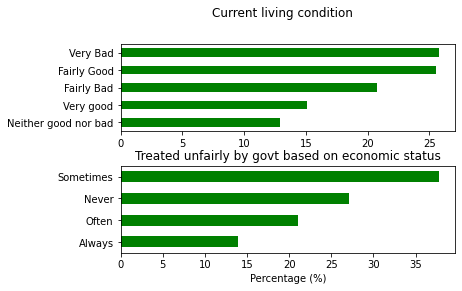

In [40]:
fig, (axis1,axis2) = plt.subplots(2,1) #creates subplots calling the subplots with 1 row and 2 columns, sharey =True makes them align better
# create space for subplot title
fig.subplots_adjust(hspace=0.4, top=0.85)
# Add main title
fig.suptitle("Current living condition", fontsize=12)
(df_new['Living condition'].value_counts(normalize=True).sort_values()*100).plot(kind='barh', ax=axis1, color='green')
plt.xlabel('Percentage (%)')
plt.gca().set_title('Treated unfairly by govt based on economic status')
(df_new['Treated unfairly by govt based on econ status'].value_counts(normalize=True).sort_values()*100).plot(kind='barh', ax=axis2, color='green');

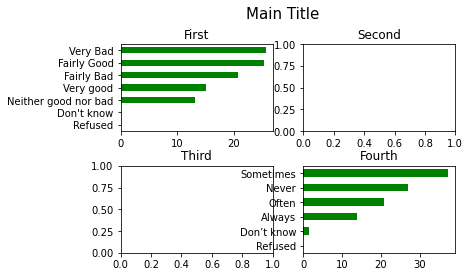

In [19]:
fig = plt.figure()

# Needed to add spacing between 1st and 2nd row
# Add a margin between the main title and sub-plots
fig.subplots_adjust(hspace=0.4, top=0.85)

# Add the main title
fig.suptitle("Main Title", fontsize=15)

# Add the subplots
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

# Plot for axis 1 and 4
(df_new['Living condition'].value_counts(normalize=True).sort_values()*100).plot(kind='barh', ax=ax1, color='green')
(df_new['Treated unfairly by govt based on econ status'].value_counts(normalize=True).sort_values()*100).plot(kind='barh', ax=ax4, color='green');


# Add the text for each subplot
ax1.title.set_text("First")
ax2.title.set_text("Second")
ax3.title.set_text("Third")
ax4.title.set_text("Fourth")
plt.show()

In [36]:
df_new['Treated unfairly by govt based on econ status'].value_counts(normalize=True)

Sometimes    0.378258
Never        0.271456
Often        0.210426
Always       0.139860
Name: Treated unfairly by govt based on econ status, dtype: float64

In [41]:
df_new['Living condition'].value_counts(normalize=True)

Very Bad                0.258106
Fairly Good             0.254927
Fairly Bad              0.207247
Very good               0.150668
Neither good nor bad    0.129053
Name: Living condition, dtype: float64